# PROGETTO DI ESAME PER LABORATORIO DI BIG DATA, DATA MINING E DATA ANALYTICS

# Introduzione


L'obiettivo di questo progetto è analizzare un dataset sui Pokémon per identificare pattern e trend significativi nelle loro caratteristiche. Utilizzando le librerie Python più comuni per l'analisi dei dati (numpy, pandas, matplotlib, seaborn, statsmodels, scikit-learn), ho esplorato diversi aspetti relativi a tipi, generazioni, caratteristiche fisiche e altre metriche.

# Fonte dei dati


Link: https://www.kaggle.com/datasets/guavocado/pokemon-stats-1025-pokemons/data
Il dataset riguarda informazioni dettagliate sui Pokémon. Include dati su tipo, statistiche, generazione, altezza, peso, genere, catch rate e molto altro. Questo dataset è stato salvato nel formato CSV e incluso nel repository.

# Obiettivi dell'analisi

1. Analisi dei Tipi di Pokémon:

  -   Visualizzare la distribuzione quantitativa dei pokemon in base ai tipi.  
  -   Studiare l'influenza dei tipi sulle statistiche.                   
  -   Confrontare i Pokémon con uno o due tipi.             
           

2. Analisi Generazionale:

- Osservare come le statistiche medie si evolvono nelle diverse generazioni.                     
- Osservare le tendenze nelle statistiche per generazione.                            

3. Relazione tra Altezza, Peso e Statistiche:

- Vedere se c'è una relazione tra altezza/peso e le statistiche totali di un Pokémon, ma eliminando i casi estremi.

4. Analizi per genere:

- Identificare il numero di pokemon con e senza genere.
- Calcolare la percentuale di avere un pokemon maschio o femmina.

# Metodologia

Pulizia dei Dati:                   
- Le colonne non pertinenti sono state eliminate per ogni analisi.

 Tecniche di Analisi:


- Analisi descrittiva per visualizzare distribuzioni e statistiche riassuntive.                   
- Test statistici (es. test T o ANOVA) per confronti.                       
- Regressione lineare e analisi delle correlazioni per esaminare relazioni tra variabili.                 
- Grafici per la visualizzazione dei dati (scatter plot, box plot, heatmap, ecc.).            

Colore dei Grafici:

- È stata adottata una codifica cromatica coerente per tipi di Pokémon, generi e altre variabili chiave.

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Importo le librerie necessarie

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, pearsonr

Caricamento del dataset

In [59]:
pokemon_df = pd.read_csv('pokemon_data.csv')

Visualizzo il DataFrame

In [60]:
pokemon_df

,dexnum,name,generation,type1,type2,species,height,weight,ability1,ability2,...,catch_rate,base_friendship,base_exp,growth_rate,egg_group1,egg_group2,percent_male,percent_female,egg_cycles,special_group
0,1,Bulbasaur,1,Grass,Poison,Seed Pokémon,0.7,6.9,Overgrow,Chlorophyll,...,45,50,64,Medium Slow,Grass,Monster,87.5,12.5,20,Ordinary
1,2,Ivysaur,1,Grass,Poison,Seed Pokémon,1.0,13.0,Overgrow,Chlorophyll,...,45,50,142,Medium Slow,Grass,Monster,87.5,12.5,20,Ordinary
2,3,Venusaur,1,Grass,Poison,Seed Pokémon,2.0,100.0,Overgrow,Chlorophyll,...,45,50,236,Medium Slow,Grass,Monster,87.5,12.5,20,Ordinary
3,4,Charmander,1,Fire,NaN,Lizard Pokémon,0.6,8.5,Blaze,Solar Power,...,45,50,62,Medium Slow,Dragon,Monster,87.5,12.5,20,Ordinary
4,5,Charmeleon,1,Fire,NaN,Flame Pokémon,1.1,19.0,Blaze,Solar Power,...,45,50,142,Medium Slow,Dragon,Monster,87.5,12.5,20,Ordinary
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,1021,Raging Bolt,9,Electric,Dragon,Paradox Pokémon,5.2,480.0,Protosynthesis,NaN,...,10,—,—,Slow,Undiscovered,NaN,NaN,NaN,—,Ancient Paradox
1021,1022,Iron Boulder,9,Rock,Psychic,Paradox Pokémon,1.5,162.5,Quark Drive,NaN,...,10,—,—,Slow,Undiscovered,NaN,NaN,NaN,—,Future Paradox
1022,1023,Iron Crown,9,Steel,Psychic,Paradox Pokémon,1.6,156.0,Quark Drive,NaN,...,10,—,—,Slow,Undiscovered,NaN,NaN,NaN,—,Future Paradox
1023,1024,Terapagos,9,Normal,NaN,Tera Pokémon,0.2,6.5,Tera Shift,NaN,...,255,—,—,Slow,Undiscovered,NaN,50.0,50.0,—,Legendary


Seleziono le colonne utili al progetto e le riassegno al DF, poi visualizzo le sue informazioni

In [61]:
columns_to_keep = [
    'generation', 'type1', 'type2', 'height', 'weight', 'hp', 'attack', 'defense', 
    'sp_atk', 'sp_def', 'speed', 'total', 'catch_rate', 'percent_male', 'percent_female'
]

pokemon_df = pokemon_df[columns_to_keep]

pokemon_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   generation      1025 non-null   int64  
 1   type1           1025 non-null   object 
 2   type2           526 non-null    object 
 3   height          1025 non-null   float64
 4   weight          1025 non-null   float64
 5   hp              1025 non-null   int64  
 6   attack          1025 non-null   int64  
 7   defense         1025 non-null   int64  
 8   sp_atk          1025 non-null   int64  
 9   sp_def          1025 non-null   int64  
 10  speed           1025 non-null   int64  
 11  total           1025 non-null   int64  
 12  catch_rate      1025 non-null   int64  
 13  percent_male    870 non-null    float64
 14  percent_female  870 non-null    float64
dtypes: float64(4), int64(9), object(2)
memory usage: 120.2+ KB


Le discrepanze sono dovute al fatto che:            
- Non tutti i Pokemon hanno 2 tipi                       
- Non tutti i Pokemon hanno un genere                 

# 1. Analisi dei Tipi

# - Visualizzare la distribuzione quantitativa dei pokemon in base ai tipi.  

Imposto un tema per la visualizzazione e i colori dei tipi.

In [63]:
sns.set_theme(style="whitegrid")

colors = {
    'Normal': '#d3d3d3', 'Fire': '#ffb84d', 'Water': '#4d94ff', 'Grass': '#66cc66', 'Electric': '#ffeb3b',
    'Ice': '#80d4ff', 'Fighting': '#ff6666', 'Poison': '#b24dff', 'Ground': '#b2996e', 'Flying': '#66c2ff',
    'Psychic': '#ff80cc', 'Bug': '#99cc66', 'Rock': '#808080', 'Ghost': '#8a4b8e', 'Dragon': '#4d0080',
    'Dark': '#1a1a1a', 'Steel': '#b3b3b3', 'Fairy': '#ff66b2'
}

Creo la serie per la conteggiatura dei pokemon in base ai tipi.

In [64]:
type_counts = pd.concat([pokemon_df['type1'], pokemon_df['type2']]).value_counts()

Creo la palette per utilizzare i colori dei tipi, creo il grafico e lo visualizzo.

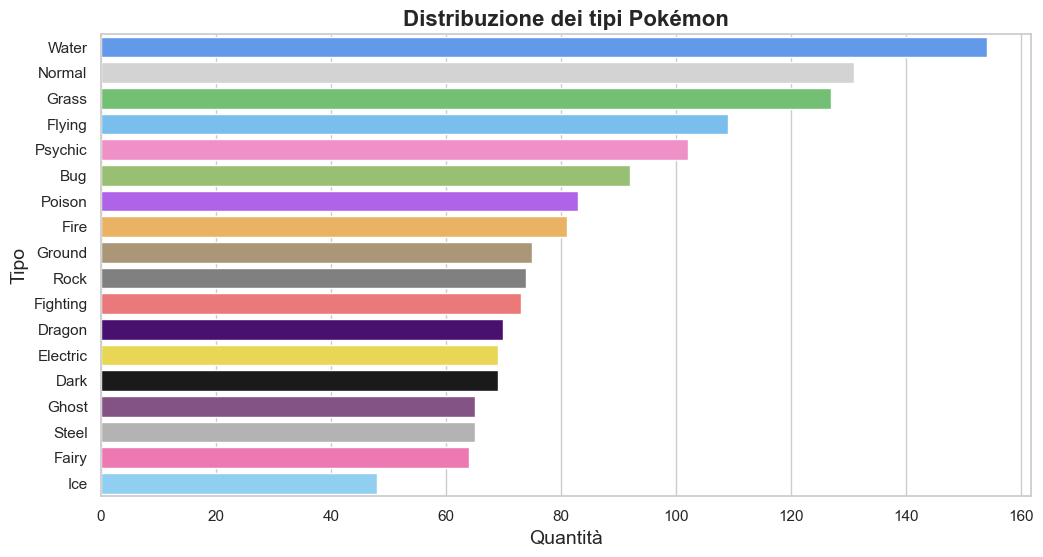

In [65]:
palette = [colors.get(t, '#d3d3d3') for t in type_counts.index]

plt.figure(figsize=(12, 6))

sns.barplot(y=type_counts.index, x=type_counts.values, hue=type_counts.index, palette=palette, edgecolor='white', dodge=False)

plt.title('Distribuzione dei tipi Pokémon', fontsize=16, fontweight='bold')
plt.ylabel('Tipo', fontsize=14)
plt.xlabel('Quantità', fontsize=14)

plt.show()

# - Visualizzare la distribuzione del totale delle statistiche in base al tipo.  

Creo la media delle statistiche base dei pokemon in base al tipo.                    
Calcolo separatamente la media per i due tipi, per evitare duplicati.

In [66]:
type_counts = pd.concat([pokemon_df['type1'], pokemon_df['type2']])

average_total_type1 = pokemon_df.groupby('type1')['total'].mean()
average_total_type2 = pokemon_df.groupby('type2')['total'].mean()

avg_total = pd.concat([average_total_type1, average_total_type2], axis=0)
avg_total = avg_total.groupby(avg_total.index).mean()

Creo la palette, il grafico e lo visualizzo.

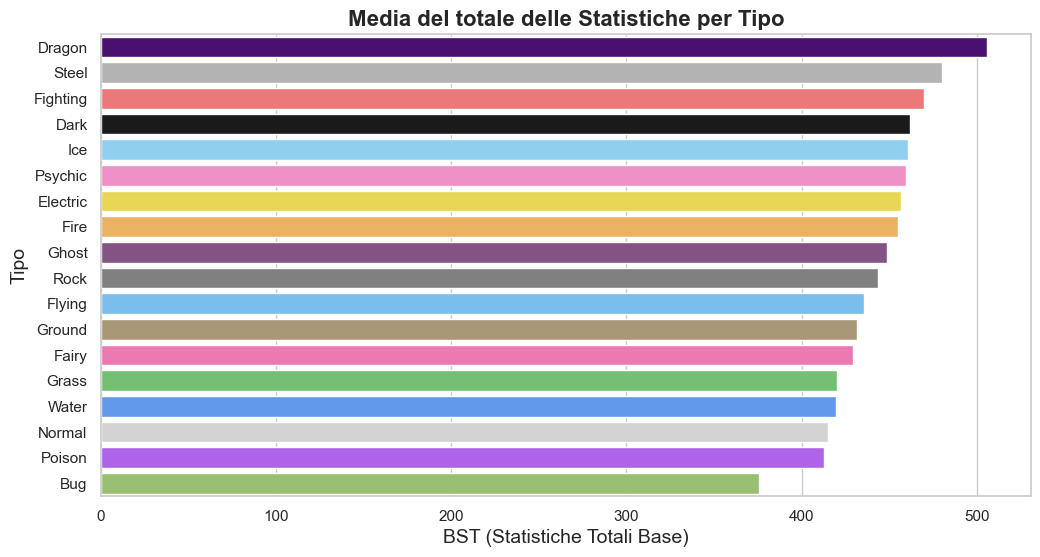

In [67]:
avg_total_sorted = avg_total.sort_values(ascending=False)

palette = [colors.get(t, '#d3d3d3') for t in avg_total_sorted.index]

plt.figure(figsize=(12, 6))

sns.barplot(y=avg_total_sorted.index, x=avg_total_sorted.values, hue=avg_total_sorted.index, palette=palette, edgecolor='white', dodge=False)

plt.title('Media del totale delle Statistiche per Tipo', fontsize=16, fontweight='bold')
plt.xlabel('BST (Statistiche Totali Base)', fontsize=14)
plt.ylabel('Tipo', fontsize=14)

plt.show()


# Visualizzare la distribuzione delle statistiche totali, confrontanto i pokemon con 1 tipo e quelli con 2 tipi.

Gestione dei valori mancanti in type2 e separazione Pokémon con un solo tipo e due tipi.

In [68]:
pokemon_df.loc[:, 'type2'] = pokemon_df['type2'].fillna('None')

single_type = pokemon_df[pokemon_df['type2'] == 'None']
dual_type = pokemon_df[pokemon_df['type2'] != 'None']

Calcolo della media e della deviazione standard.

In [69]:
single_avg = single_type['total'].mean()
dual_avg = dual_type['total'].mean()

Visualizzazione delle medie e delle distribuzioni.

Media BST per Pokémon con un solo tipo: 403.08
Media BST per Pokémon con due tipi: 451.03


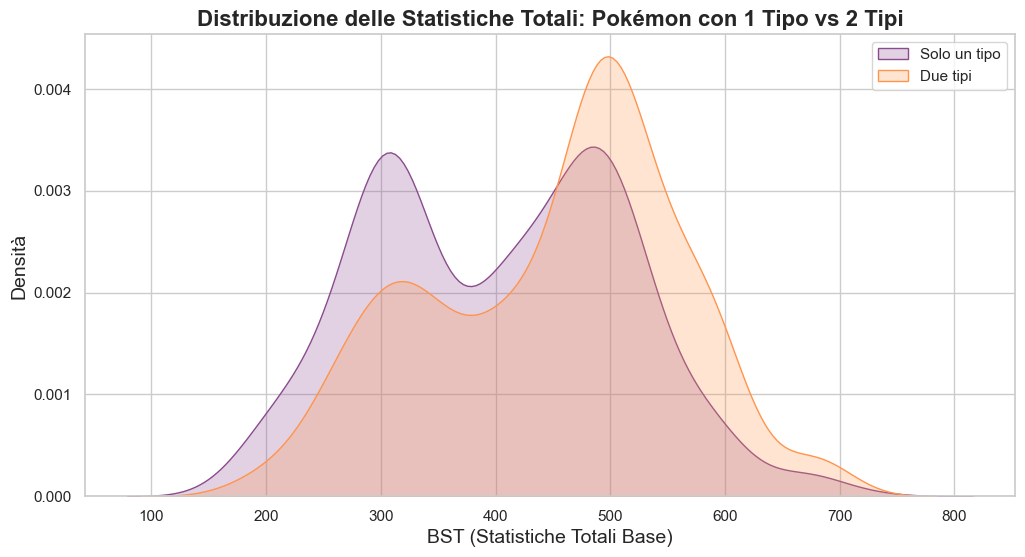

In [70]:
print(f"Media BST per Pokémon con un solo tipo: {single_avg:.2f}")
print(f"Media BST per Pokémon con due tipi: {dual_avg:.2f}")

plt.figure(figsize=(12, 6))
sns.kdeplot(single_type['total'], label='Solo un tipo', fill=True, color='#8a4b8e')
sns.kdeplot(dual_type['total'], label='Due tipi', fill=True, color='#ff944d')

plt.title('Distribuzione delle Statistiche Totali: Pokémon con 1 Tipo vs 2 Tipi', fontsize=16, fontweight='bold')
plt.xlabel('BST (Statistiche Totali Base)', fontsize=14)
plt.ylabel('Densità', fontsize=14)
plt.legend()
plt.show()

# 2. Analisi Generazionale

# - Visualizzare l'andamento della media del totale delle statistiche per generazione.

Calcolo della media delle statistiche totali per generazione.

In [ ]:
generation_total_stats = pokemon_df.groupby('generation')['total'].mean()

Creare il grafico dell'andamento delle statistiche totali per generazione.

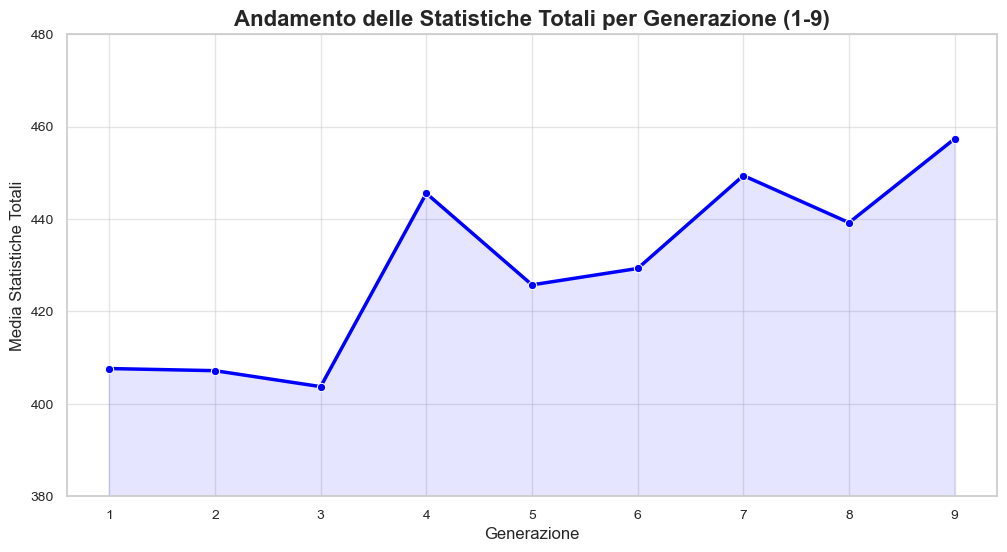

In [ ]:
plt.figure(figsize=(12, 6))

sns.lineplot(
    x=generation_total_stats.index,
    y=generation_total_stats.values,
    marker='o',
    linewidth=2.5,
    color="blue"
)

plt.title('Andamento delle Statistiche Totali per Generazione (1-9)', fontsize=16, fontweight='bold')
plt.xlabel('Generazione', fontsize=12)
plt.ylabel('Media Statistiche Totali', fontsize=12)
plt.xticks(range(1, 10), fontsize=10)
plt.yticks(fontsize=10)
plt.grid(alpha=0.5)

plt.ylim(380, 480)

plt.fill_between(
    generation_total_stats.index,
    generation_total_stats.values,
    color='blue',
    alpha=0.1
)

plt.show()


# - Visualizzare le tendenze nelle statistiche per generazione. 

Creo una lista delle statistiche.

In [ ]:
statistiche = ['hp', 'attack', 'defense', 'sp_atk', 'sp_def', 'speed']

Creo i vari grafici, divisi per statistica, per controllare le tendenze per generazione.

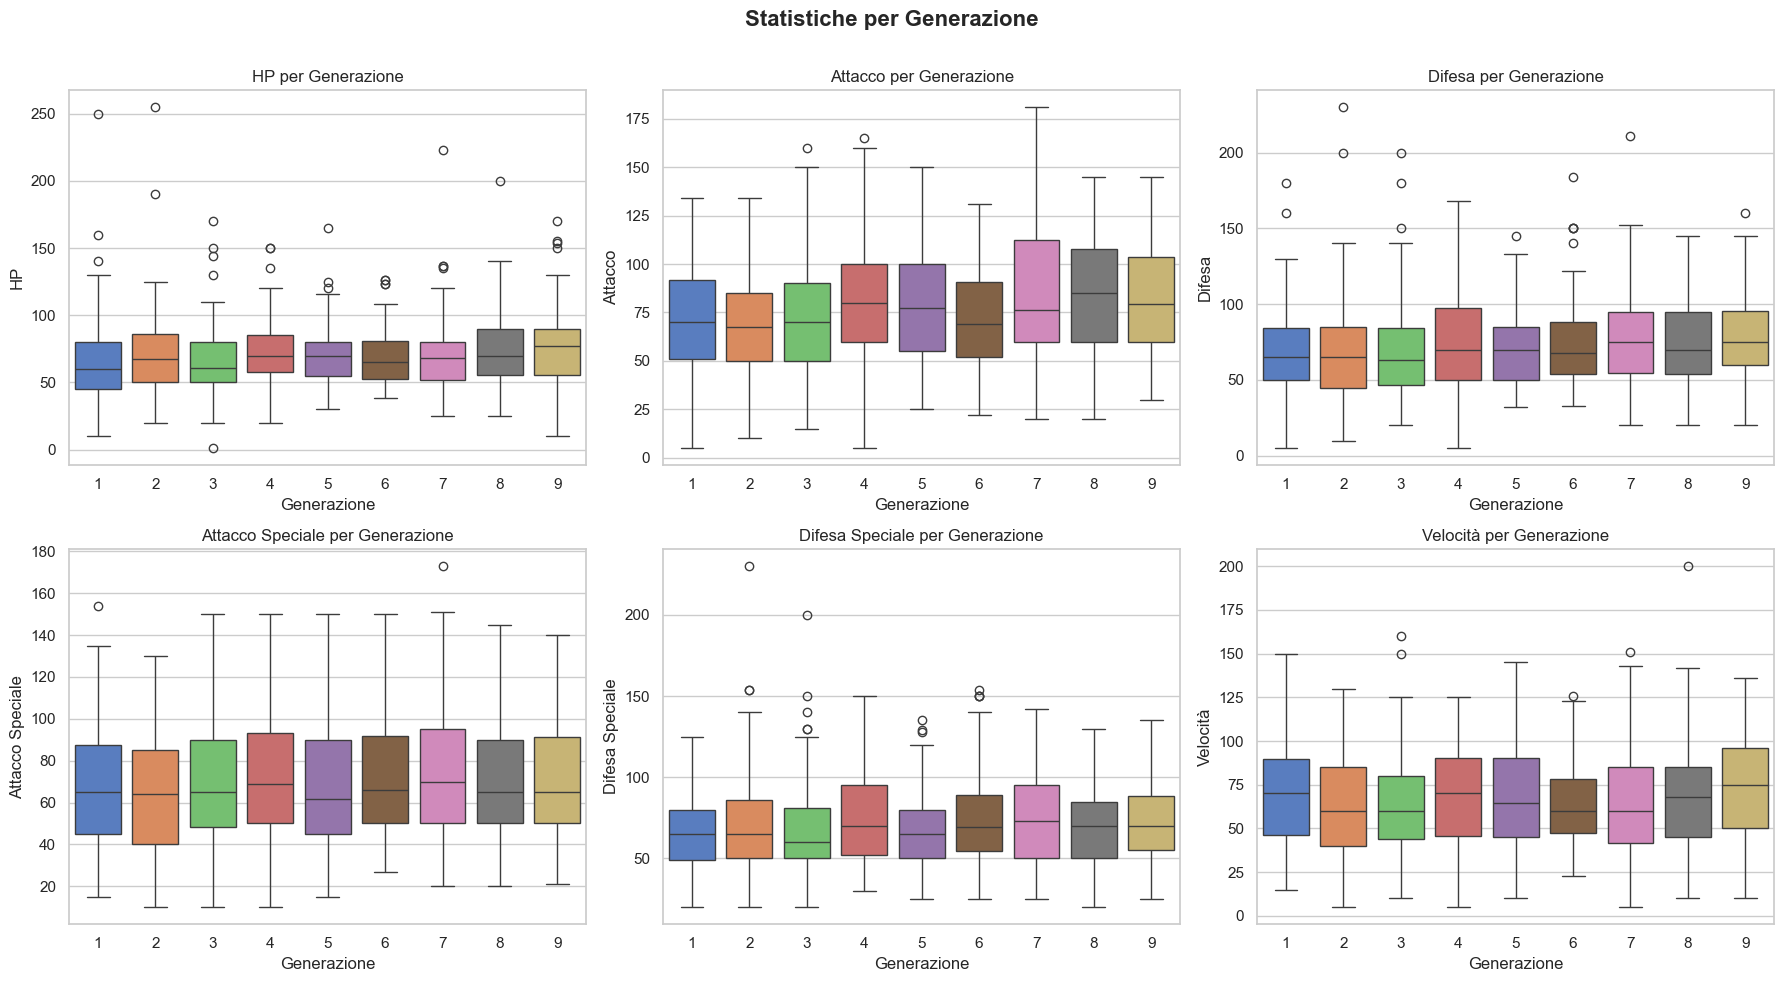

In [80]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

titles = ['HP', 'Attacco', 'Difesa', 'Attacco Speciale', 'Difesa Speciale', 'Velocità']

for i, stat in enumerate(statistiche):
    ax = axes[i//3, i%3] 
    sns.boxplot(x='generation', y=stat, data=pokemon_df, hue='generation', palette='muted', ax=ax, legend=False)
    ax.set_title(f'{titles[i]} per Generazione')
    ax.set_xlabel('Generazione')
    ax.set_ylabel(titles[i])


plt.suptitle('Statistiche per Generazione', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()



# 3. Relazione tra Altezza, Peso e Statistiche:

# - Vedere se c'è una relazione tra altezza/peso e le statistiche totali di un Pokémon, ma eliminando i casi estremi.

Filtro i dati , l'analisi diventa più chiara e meno influenzata da Pokémon estremi.

In [ ]:
q1_height, q3_height = pokemon_df['height'].quantile([0.05, 0.95])
q1_weight, q3_weight = pokemon_df['weight'].quantile([0.05, 0.95])

filtered_df = pokemon_df[
    (pokemon_df['height'] >= q1_height) & (pokemon_df['height'] <= q3_height) &
    (pokemon_df['weight'] >= q1_weight) & (pokemon_df['weight'] <= q3_weight)
]

Creo i due grafici rappresentati le due relazioni.

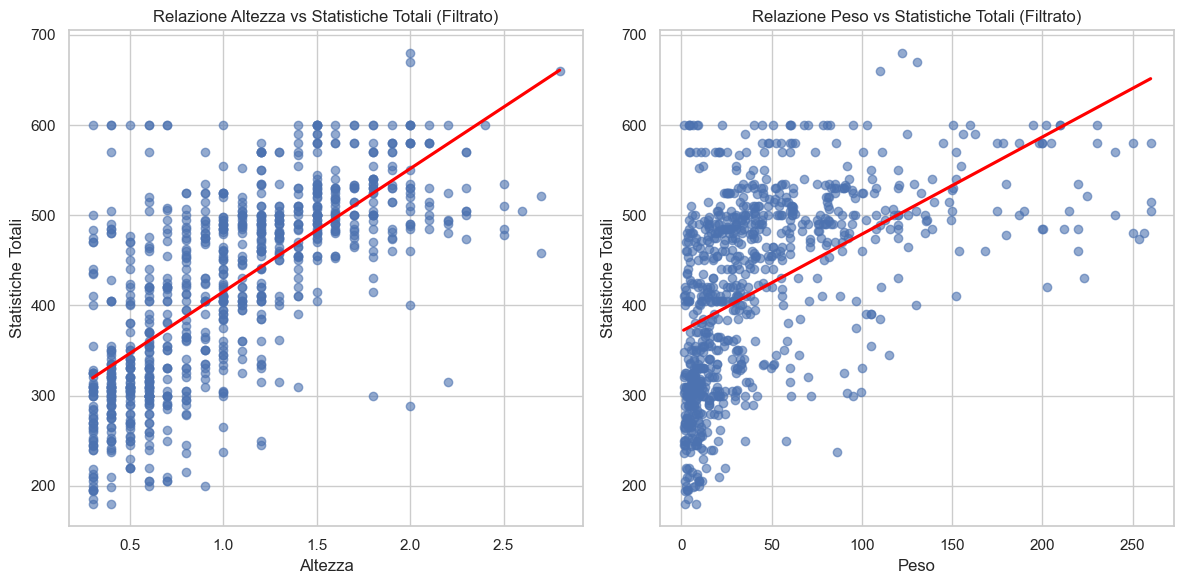

In [99]:
plt.figure(figsize=(12, 6))

# Scatter plot (Altezza)
plt.subplot(1, 2, 1)
sns.regplot(x='height', y='total', data=filtered_df, scatter_kws={'alpha': 0.6}, line_kws={'color': 'red'}, ci=None)
plt.title('Relazione Altezza vs Statistiche Totali (Filtrato)')
plt.xlabel('Altezza')
plt.ylabel('Statistiche Totali')

# Scatter plot (Peso)
plt.subplot(1, 2, 2)
sns.regplot(x='weight', y='total', data=filtered_df,scatter_kws={'alpha': 0.6}, line_kws={'color': 'red'}, ci=None)
plt.title('Relazione Peso vs Statistiche Totali (Filtrato)')
plt.xlabel('Peso')
plt.ylabel('Statistiche Totali')

plt.tight_layout()
plt.show()

# 4. Analizi per genere:

# - Identificare il numero di pokemon con e senza genere.

Aggiungo colonna per tenere treccia di chi ha un genere o meno e poi li conto.

In [142]:
pokemon_df.loc[:, 'has_Gender'] = pokemon_df['percent_male'].notna() & pokemon_df['percent_female'].notna()

gender_counts = pokemon_df['has_Gender'].value_counts()

Creo il grafico, per contare i pokemon con e senza genere.

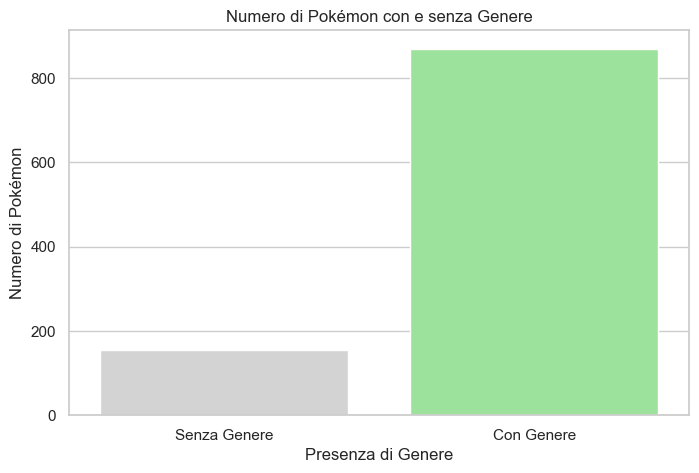

In [121]:
plt.figure(figsize=(8, 5))

sns.barplot(x=gender_counts.index, y=gender_counts.values, palette=['lightgrey', 'lightgreen'], hue=gender_counts.index, legend=False)

plt.xticks([0, 1], ['Senza Genere', 'Con Genere'])
plt.title('Numero di Pokémon con e senza Genere')
plt.ylabel('Numero di Pokémon')
plt.xlabel('Presenza di Genere')
plt.show()

# - Calcolare la percentuale di avere un pokemon maschio o femmina.

Estrazione dei Pokémon con genere definito e calcolo delle percentuali medie di maschi e femmine

In [ ]:
gender_data = pokemon_df[pokemon_df['has_Gender']].copy()

gender_data.loc[:, 'maschi_percent'] = gender_data['percent_male']
gender_data.loc[:, 'femmine_percent'] = gender_data['percent_female']

average_male_percent = gender_data['maschi_percent'].mean()
average_female_percent = gender_data['femmine_percent'].mean()

gender_distribution = {
    'Maschi': average_male_percent,
    'Femmine': average_female_percent
}

Creo il grafico per visualizzare la distribuzione percentuale di Maschi e Femmine e stampo la media per genere

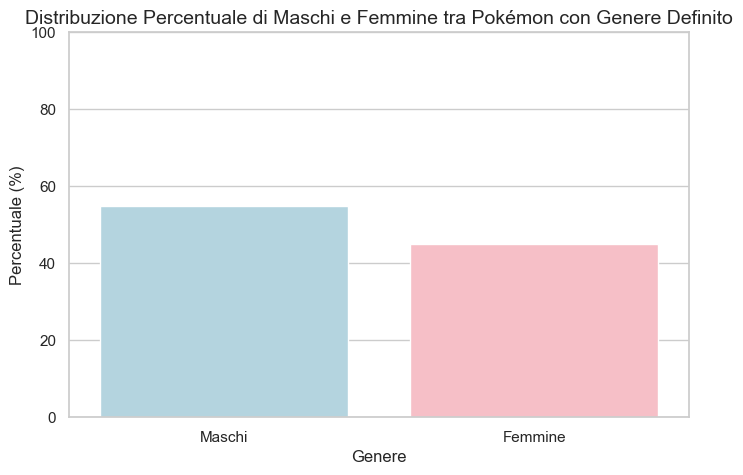

Percentuale media di maschi: 54.93%
Percentuale media di femmine: 45.07%


In [ ]:
plt.figure(figsize=(8, 5))

sns.barplot(x=list(gender_distribution.keys()), y=list(gender_distribution.values()), palette=['lightblue', 'lightpink'], hue=list(gender_distribution.keys()), legend=False)

plt.title('Distribuzione Percentuale di Maschi e Femmine tra Pokémon con Genere Definito', fontsize=14)
plt.xlabel('Genere', fontsize=12)
plt.ylabel('Percentuale (%)', fontsize=12)
plt.ylim(0, 100)
plt.show()

print(f"Percentuale media di maschi: {average_male_percent:.2f}%")
print(f"Percentuale media di femmine: {average_female_percent:.2f}%")